In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data_ready_for_ML_BE.csv')
teams_to_num_df = pd.read_csv('teams_dict_data_frame.csv')

In [4]:
#handling a bug
#df = df.iloc[:,1:]

In [5]:
def give_me_from_this_df_dictionary(teams_to_num_df):
    team_number = teams_to_num_df['team_number']
    team_name = teams_to_num_df['team_name']
    return {team_number[i]: team_name[i] for i in range(len(team_number))}

In [6]:
teams_dictionary = give_me_from_this_df_dictionary(teams_to_num_df)

In [7]:
#fixing the dent
teams_dictionary[0]='Empty dataset'

In [8]:
data_frames_list = list()

In [9]:
for x in sorted(teams_dictionary):
    new_data_frame = df[df["team_1"] == x]
    new_data_frame = new_data_frame.iloc[:,1:]
    data_frames_list.append(new_data_frame)

In [10]:
#Reversing the dictionary:
inv_teams_nums_dict = {v: k for k, v in teams_dictionary.items()}

In [11]:
def ml_algorithm_linear_regression_v1(this_team, inv_teams_nums_dict, data_frames_list):
    lr_rating = linear_model.LinearRegression() # create a linear regression object

    current_data_frame=data_frames_list[inv_teams_nums_dict[this_team]]
    current_data_frame = current_data_frame[(current_data_frame['year'] != 1995) & (current_data_frame['year'] != 1996) & (current_data_frame['year'] != 1997) & (current_data_frame['year'] != 1998) & (current_data_frame['year'] != 1999)]

    x = current_data_frame['year'].values.reshape(current_data_frame['year'].shape[0],1)
    y = current_data_frame['attendance'].values.reshape(current_data_frame['attendance'].shape[0],1)

    lr_rating.fit(X=x, y=y)

    plt.scatter(x, y,  color='black')
    plt.plot(x, lr_rating.predict(x), color='blue', linewidth=3)

    plt.xlabel('Year')
    plt.ylabel('Attendance')
    plt.show()

    print("Slope:",lr_rating.coef_)
    print("Intercept:",lr_rating.intercept_)
    print("R2:",lr_rating.score(x,y))

In [12]:
def ml_algorithm_with_multiple_var(this_team, inv_teams_nums_dict, data_frames_list):
    lr_rating = linear_model.LinearRegression() 
    
    current_data_frame=data_frames_list[inv_teams_nums_dict[this_team]]
    print(current_data_frame)
    current_data_frame = current_data_frame[(current_data_frame['year'] != 1995) & (current_data_frame['year'] != 1996) & (current_data_frame['year'] != 1997) & (current_data_frame['year'] != 1998) & (current_data_frame['year'] != 1999)]
    x = current_data_frame[["team_1_rating","team_2_rating", "month", "derby", "city", "year"]]
    y = current_data_frame['attendance']
    lr_rating.fit(X=x, y=y);
    
    print("Slope:",lr_rating.coef_)
    print("Intercept:",lr_rating.intercept_)
    print("R2:",lr_rating.score(x,y))

Insert team name: Manchester City
Insert 1 for one variable linear regression / 2 for multiply variables linear regressions: 1


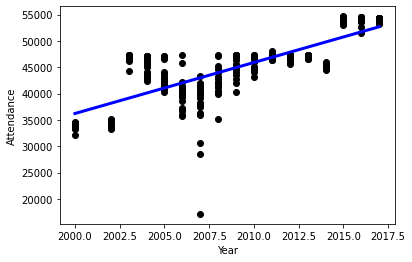

Slope: [[969.17139506]]
Intercept: [-1902116.59503409]
R2: 0.6107997548015636


In [14]:
#Write here the team name you would like to check:
team_name = input("Insert team name: ")
option = int(input("Insert 1 for one variable linear regression / 2 for multiply variables linear regressions: "))
if(option == 1):
    ml_algorithm_linear_regression_v1(team_name, inv_teams_nums_dict, data_frames_list)
else:
    ml_algorithm_with_multiple_var(team_name, inv_teams_nums_dict, data_frames_list)